<a href="https://colab.research.google.com/github/aneeshmurali-n/Unsupervised-Learning-Clustering-Techniques-on-Iris-Dataset/blob/main/Unsupervised_Learning_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Loading and Preprocessing


*   Load the Iris dataset from sklearn
*   Drop the species column since this iS a clustering problem.




In [650]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris # import iris dataset from sklearn
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram,linkage

In [651]:
# load the Iris dataset from sklearn
iris = load_iris()

In [652]:
# get feature_names
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [653]:
iris.target_names # get target names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [654]:
# create data frame having species column
iris_data =  pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data['species'] = iris.target_names[iris.target]

In [655]:
iris_data # show df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Original data Scatterplot

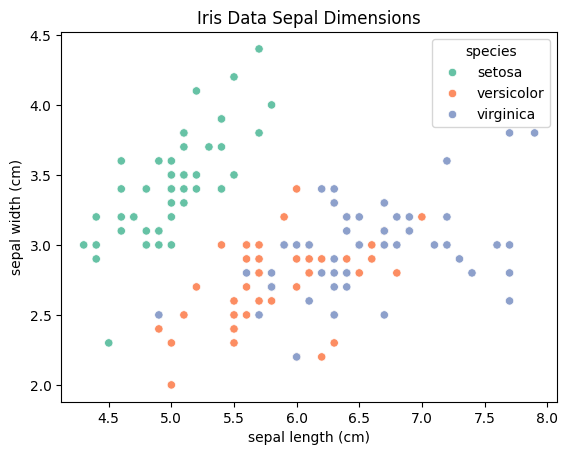

In [656]:
sns.scatterplot(x ='sepal length (cm)', y = 'sepal width (cm)', data=iris_data, hue='species', palette='Set2')
plt.title('Iris Data Sepal Dimensions')
plt.show()

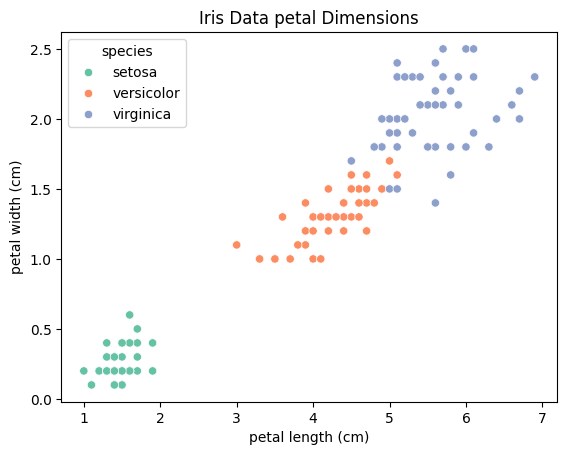

In [657]:
sns.scatterplot(x = 'petal length (cm)', y = 'petal width (cm)', data=iris_data, hue='species', palette='Set2')
plt.title('Iris Data petal Dimensions')
plt.show()

Here we are going to create a dataframe with feature_names that doesn't include species column for Unsupervised Learning and clustering

In [658]:
df = pd.DataFrame(iris.data, columns=iris.feature_names) # create a data frame from the iris dataset
df # view df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [659]:
df.info() # view df info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [660]:
df.describe() # view df description

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [661]:
# Scaled df StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df_std = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df_std

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [662]:
# Scaled df MinMaxScaler
scaler = MinMaxScaler()
scaled_data_minmax = scaler.fit_transform(df)
scaled_df_minmax = pd.DataFrame(scaled_data_minmax, columns=df.columns)
scaled_df_minmax

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [663]:
df # Original df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## 2.Clustering Algorithm Implementation

### A) KMeans Clustering
* KMeans is an unsupervised algorithm that partitions data into k clusters.
It starts by randomly selecting k centroids, then assigns each data point to the nearest centroid based on distance. The centroids are updated by calculating the mean of points in each cluster. This process of assignment and updating repeats until the centroids no longer change or a maximum number of iterations is reached, resulting in k distinct clusters.

#### Why KMens
* The dataset is well-separated into three classes.
* The features are numerical, making distance-based clustering.
* KMeans identifies natural groupings in data based on feature similarities. In the Iris dataset, these clusters often align with species labels, as features like petal length and width help distinguish the different species.

In [664]:
x = df
kmeans = KMeans(n_clusters = 3, n_init=20,random_state = 42)
kmeans.fit(x)
cluster = kmeans.labels_


In [665]:
cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [666]:
kmeans.n_iter_

4

#### Visualising the clusters (predicted data)

In [667]:
kmeans_df = x.copy() #  make a copy of x df
kmeans_df['cluster'] = cluster # add cluster column
kmeans_df # show df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


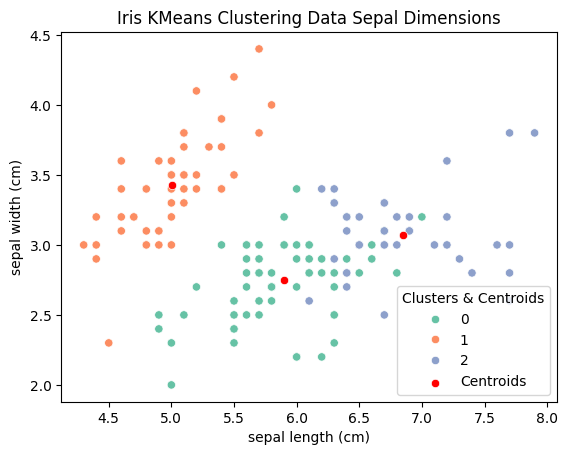

In [668]:
# visualize the clusters.(Iris KMeans Clustering Data Sepal Dimension)
sns.scatterplot(x = 'sepal length (cm)', y = 'sepal width (cm)', data=kmeans_df, hue='cluster', palette='Set2')
#Plotting the centroids of the clusters
sns.scatterplot(x = kmeans.cluster_centers_[:, 0], y= kmeans.cluster_centers_[:,1], c = 'red', label = 'Centroids')
plt.title('Iris KMeans Clustering Data Sepal Dimensions')
plt.legend(title='Clusters & Centroids')
plt.show()

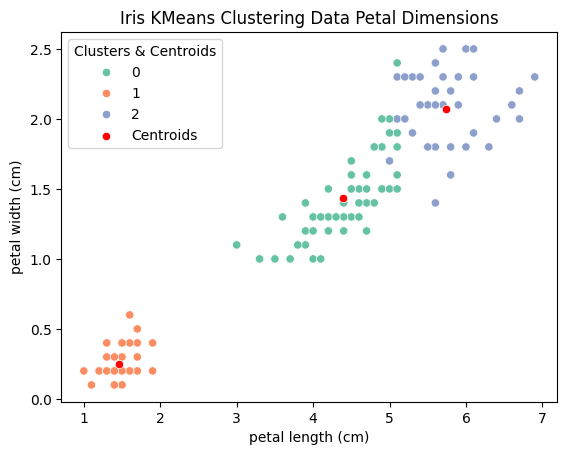

In [669]:
# visualize the clusters. (Iris KMeans Clustering Data Petal Dimensions)
sns.scatterplot(x = 'petal length (cm)', y = 'petal width (cm)', data=kmeans_df, hue='cluster', palette='Set2')
#Plotting the centroids of the clusters
sns.scatterplot(x = kmeans.cluster_centers_[:, 2], y= kmeans.cluster_centers_[:,3], c = 'red', label = 'Centroids')
plt.title('Iris KMeans Clustering Data Petal Dimensions')
plt.legend(title='Clusters & Centroids')
plt.show()

In [670]:
silhouette_avg = silhouette_score(x, cluster)
print(f"Silhouette Score: {silhouette_avg}")



Silhouette Score: 0.5528190123564095


### B) Hierarchical Clustering
Hierarchical clustering is an unsupervised algorithm that creates a hierarchy of clusters. It has two types Agglomerative Hierarchical Clustering and Divisive Hierarchical Clustering.

#### Agglomerative Hierarchical Clustering:
* This is the more common method, working in a bottom-up manner.
* It starts with each data point as a separate group.
* The algorithm then combines similar groups step-by-step until only one large group remains or until the desired number of groups is reached.
* The similarity between groups can be measured in various ways, such as using Ward's method or single linkage.

#### Divisive Hierarchical Clustering:
* Working in a top to bottom manner.
* Starts with all data points in one large group.
* It starts with one big group and then splits it into smaller and smaller groups, which can take a long time to do and computationally expensive.


#### Why Hierarchical clustering:
* It clusters data without needing to know the correct labels.
* The dataset has only three types of iris species that hierarchical clustering can easily group.
* It works well on small datasets like Iris, have only 150 samples and 4 features.
* It provides visual representations. (Dendrogram)




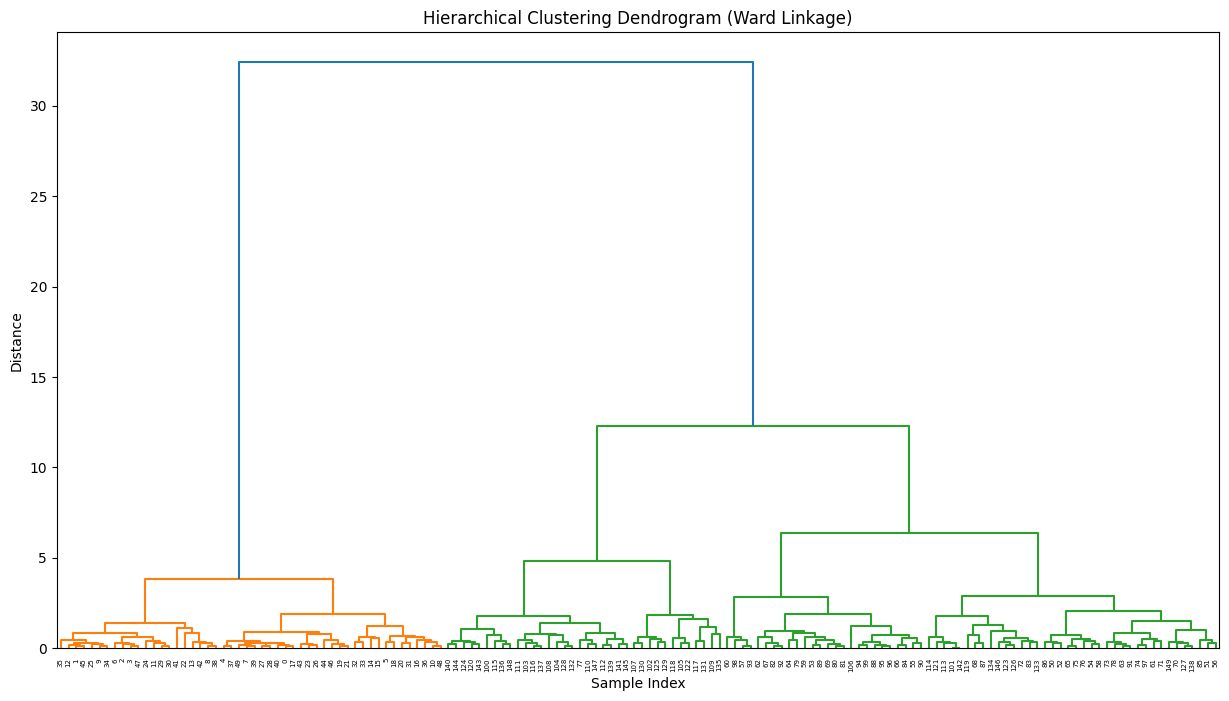

In [671]:
# linkage matrix
z = linkage(x, method='ward')
# draw dendrogram
plt.figure(figsize=(15, 8))
dendrogram(z)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [672]:
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
hc.fit(x) # fit model to the data
hc_cluster = hc.labels_ # get cluster labels

In [673]:
hc_cluster # show cluster labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [674]:
x.head() # show x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [675]:
hc_cluster_df = x.copy() # copy x
hc_cluster_df['cluster'] = hc_cluster # add hc_cluster  label to the x and make new df
hc_cluster_df # show df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#### Visualising the clusters (predicted data)

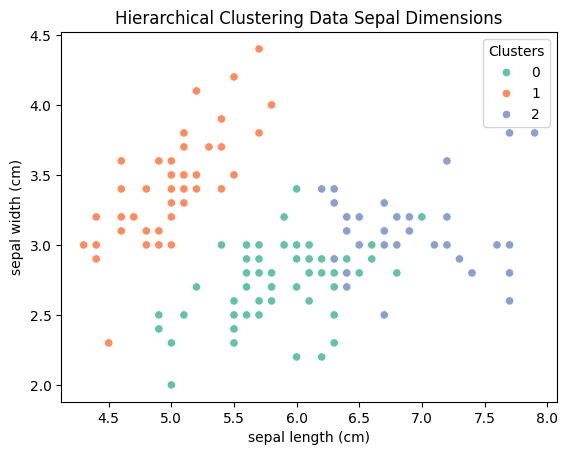

In [676]:
# visualize the clusters.(Hierarchical Clustering Data Sepal Dimension)
sns.scatterplot(x = 'sepal length (cm)', y = 'sepal width (cm)', data=hc_cluster_df, hue='cluster', palette='Set2')
plt.title('Hierarchical Clustering Data Sepal Dimensions')
plt.legend(title='Clusters')
plt.show()

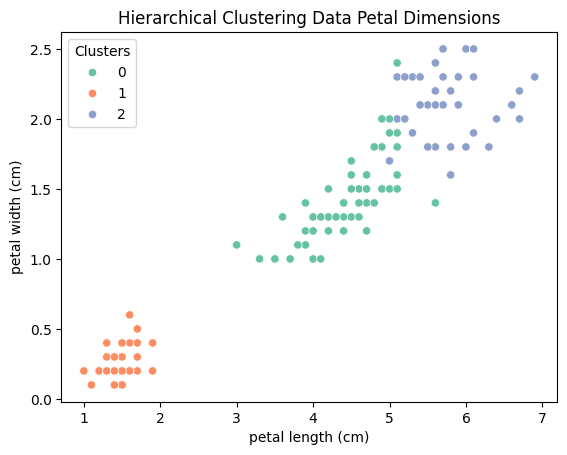

In [677]:
# visualize the clusters.(Hierarchical Clustering Data Petal Dimension)
sns.scatterplot(x = 'petal length (cm)', y = 'petal width (cm)', data=hc_cluster_df, hue='cluster', palette='Set2')
plt.title('Hierarchical Clustering Data Petal Dimensions')
plt.legend(title='Clusters')
plt.show()

In [678]:
silhouette_avg = silhouette_score(x, hc_cluster)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5543236611296419


#### Remark :
We found that scaling had a negative impact on the performance of K-Means and Hierarchical Clustering for the Iris dataset. Therefore, we proceeded with the unscaled DataFrame df